In [155]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import block_reduce
from scipy.ndimage import maximum_filter



In [156]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


In [157]:
# Example usage
# base_dir = 'path/to/run_06'
# Check if the 'results' directory exists
if os.path.exists('results') and os.path.isdir('results'):
    os.chdir('results')
base_dir = os.path.join(os.getcwd(), 'run best')


# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: /Users/yajatkapoor/Downloads/results/run best
Number of .npy files loaded: 6
Array 1 shape: (50, 8, 65, 64)
Array 2 shape: (50, 8, 65, 64)
Array 3 shape: (50, 8, 65, 64)
Array 4 shape: (50, 8, 65, 64)
Array 5 shape: (50, 65, 512)
Array 6 shape: (50, 8, 65, 65)


In [158]:
# os.getcwd()

In [159]:
# # target_dir = os.path.join(base_dir, epoch, batch, layer)
# # target_dir = base_dir
# base_dir = os.getcwd()
    
# # Check if the directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"Directory {target_dir} does not exist.")

In [160]:
os.path.exists(base_dir)

True

In [161]:

def heat_map_display(img_idx,epoch_no,head,block_size,filter_action):
    
    data_list=list()
    for i in range(6):
        epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

        batch = 'batch 0'   # Replace with your specific batch

        layer = 'layer 0'+str(i)  # Replace with your specific layer

        npy_data = load_npy_files(base_dir, epoch, batch, layer)
        data_list.append(npy_data)
    
    
    # Set up the grid for displaying heatmaps
    num_layers = len(data_list)
    cols = 2  # Number of columns in the grid
    rows = (num_layers + cols - 1) // cols  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 25))  # Create a grid of subplots
    axes = axes.flatten()  # Flatten axes to easily iterate
   
    for i in range(len(data_list)):
        
# <<<<<<< local
        attention_map = data_list[i][1]
        if(filter_action=='block_reduce'):
            downsampled_map = block_reduce(attention_map[img_idx][head], block_size=(block_size, block_size), func=np.max)
        else:
            attention_map=attention_map.astype(np.float32)
            # downsampled_map = block_reduce(attention_map[img_idx][head], block_size=(block_size, block_size), func=np.max)
            downsampled_map = maximum_filter(attention_map[img_idx][head], size=block_size, mode='constant', cval=-np.inf)

            # Downsample by slicing the array to the intended shape (e.g., 4x4 to 3x3 for this example)
            downsampled_map = downsampled_map[::block_size, ::block_size]
       
       
        sns.heatmap(downsampled_map, cmap='viridis', annot=False, cbar=True, 
                    linewidths=0.5, linecolor='black', ax=axes[i])  # Use specific subplot axis
        
        axes[i].set_xlabel('X- axis')
        axes[i].set_ylabel('Y- axis')
        axes[i].set_title(f'Layer {i} Attention Heatmap')

# >>>>>>> remote
        # plt.xlabel('X- axis')
        # plt.ylabel('Y- axis')
        # plt.title('Attention Heatmap')
        # plt.show()
        
    # Remove any empty subplots if num_layers < rows*cols
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


       
    

    


        


In [162]:

# def heat_map_display1(img_idx,epoch_no,head,block_size):
    
#     data_list=list()
#     for i in range(6):
#         epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

#         batch = 'batch 0'   # Replace with your specific batch

#         layer = 'layer 0'+str(i)  # Replace with your specific layer

#         npy_data = load_npy_files(base_dir, epoch, batch, layer)
#         data_list.append(npy_data)
    
    
#     # print(type(data_list[0][5]))
#     # print(type(data_list[0][5][img_idx][head]))
   
#     for i in range(len(data_list)):
        
# # <<<<<<< local
#         attention_map = data_list[i][1]
#         attention_map=attention_map.astype(np.float32)
#         # downsampled_map = block_reduce(attention_map[img_idx][head], block_size=(block_size, block_size), func=np.max)
#         downsampled_map = maximum_filter(attention_map[img_idx][head], size=block_size, mode='constant', cval=-np.inf)

#         # Downsample by slicing the array to the intended shape (e.g., 4x4 to 3x3 for this example)
#         downsampled_map = downsampled_map[::block_size, ::block_size]

#         # type(attention_map)
       
#         plt.figure(figsize=(10, 8))  # Create a figure with a specified size
#         # sns.heatmap(attention_map[img_idx][head], cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')
#         sns.heatmap(downsampled_map, cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')

# # >>>>>>> remote
#         plt.xlabel('Key Tokens')
#         plt.ylabel('Query Tokens')
#         plt.title('Attention Heatmap')
#         plt.show()


       
    

    


        


In [163]:


# def heat_map(target_data,img_idx):
#     attention_scores =target_data
#     attention_scores=target_data[img_idx]

#     # Average over the first dimension (samples), resulting in shape (8, 65, 64)
#     # average_attention = attention_scores.mean(axis=0)
    
#     # Determine the grid size
#     # num_heads = average_attention.shape[0]
#     # num_heads = attention_scores.shape[0]
#     num_heads=4
#     grid_size = 3
#     # Create a figure for the grid of plots
#     fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

#     # Flatten the axes array for easy iteration
#     axes = axes.flatten()

#     # Plot each head's attention heatmap
#     for i in range(num_heads):
#         print(type(attention_scores[i]))
#         sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])
#         # print(attention_scores[i].shape)

#         axes[i].set_title(f'Head {i + 1}')
#         axes[i].set_xlabel('Key Tokens')
#         axes[i].set_ylabel('Query Tokens')

#     # Hide any unused subplots
#     for j in range(num_heads, len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

In [164]:
npy_data[2][2].shape

(8, 65, 64)

In [165]:
print(type(npy_data))

<class 'list'>


In [166]:
# import numpy as np
# from scipy.ndimage import maximum_filter

# # Example array (5x5)
# attention_map = np.array([[1, 2, 3, 4],
#                           [5, 6, 7, 8],
#                           [9, 10, 11, 12],
#                           [13, 14, 15, 16]])

# # Apply maximum filter with a 2x2 block size and mode 'constant'
# block_size = 2
# downsampled_map = maximum_filter(attention_map, size=block_size, mode='constant', cval=-np.inf)

# # Downsample by slicing the array to the intended shape (e.g., 4x4 to 3x3 for this example)
# downsampled_map = downsampled_map[::block_size, ::block_size]

# print("Downsampled Map:")
# print(downsampled_map)


<span style="color:red"><b><<<<<<< local</b></span>

In [167]:

inputs_dir= os.path.join(base_dir, 'epoch 01', batch, 'inputs.npy')
labels_dir= os.path.join(base_dir, 'epoch 01', batch, 'labels.npy')

In [168]:
def get_outputs(epoch_num):
    outputs_dir = os.path.join(base_dir, f'epoch {epoch_num:02}', batch, 'outputs.npy')
    outputs = np.load(outputs_dir)
    return outputs


In [169]:
# inputs = np.load(inputs_dir)
# outputs = get_outputs(1)
# labels = np.load(labels_dir)

In [170]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(images, idx):
    """
    Display a color image of shape (1, 3, width, height) using Matplotlib.

    Parameters:
    - image: np.ndarray of shape (1, 3, width, height)
    """
    image = images[idx]
    # print(image)
    # if image.ndim != 4 or image.shape[0] != 1 or image.shape[1] != 3:
    #     raise ValueError("Input image must have shape (1, 3, width, height)")

    # Remove the singleton dimension and transpose to (height, width, 3)
    image_display = np.transpose(image.squeeze(), (1, 2, 0))

    # Display the image
    plt.imshow(image_display)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
# width, height = 640, 480
# image = np.random.rand(1, 3, height, width)  # Replace with actual image data
# display_image(image)


In [171]:
img_idx = 10
# labels[img_idx],np.argmax( outputs[img_idx],axis=-1)

In [172]:
# outputs[4]

In [173]:
# outputs[0]

In [174]:
# outputs = get_outputs(72)

In [175]:
# l1 = np.argmax(outputs,axis = -1)
# for i in range(10):
#     print(l1[i], labels[i])

In [176]:
############# NOTE #################
# 1. output saving 
# 2. downsample the attention matrix to 
# 3. try domsampling with mean and median and max all 3
# 4. (not imp) why is qkv 65x65

# (try and get good heatmap and mail to sir)

<span style="color:red"><b>=======</b></span>

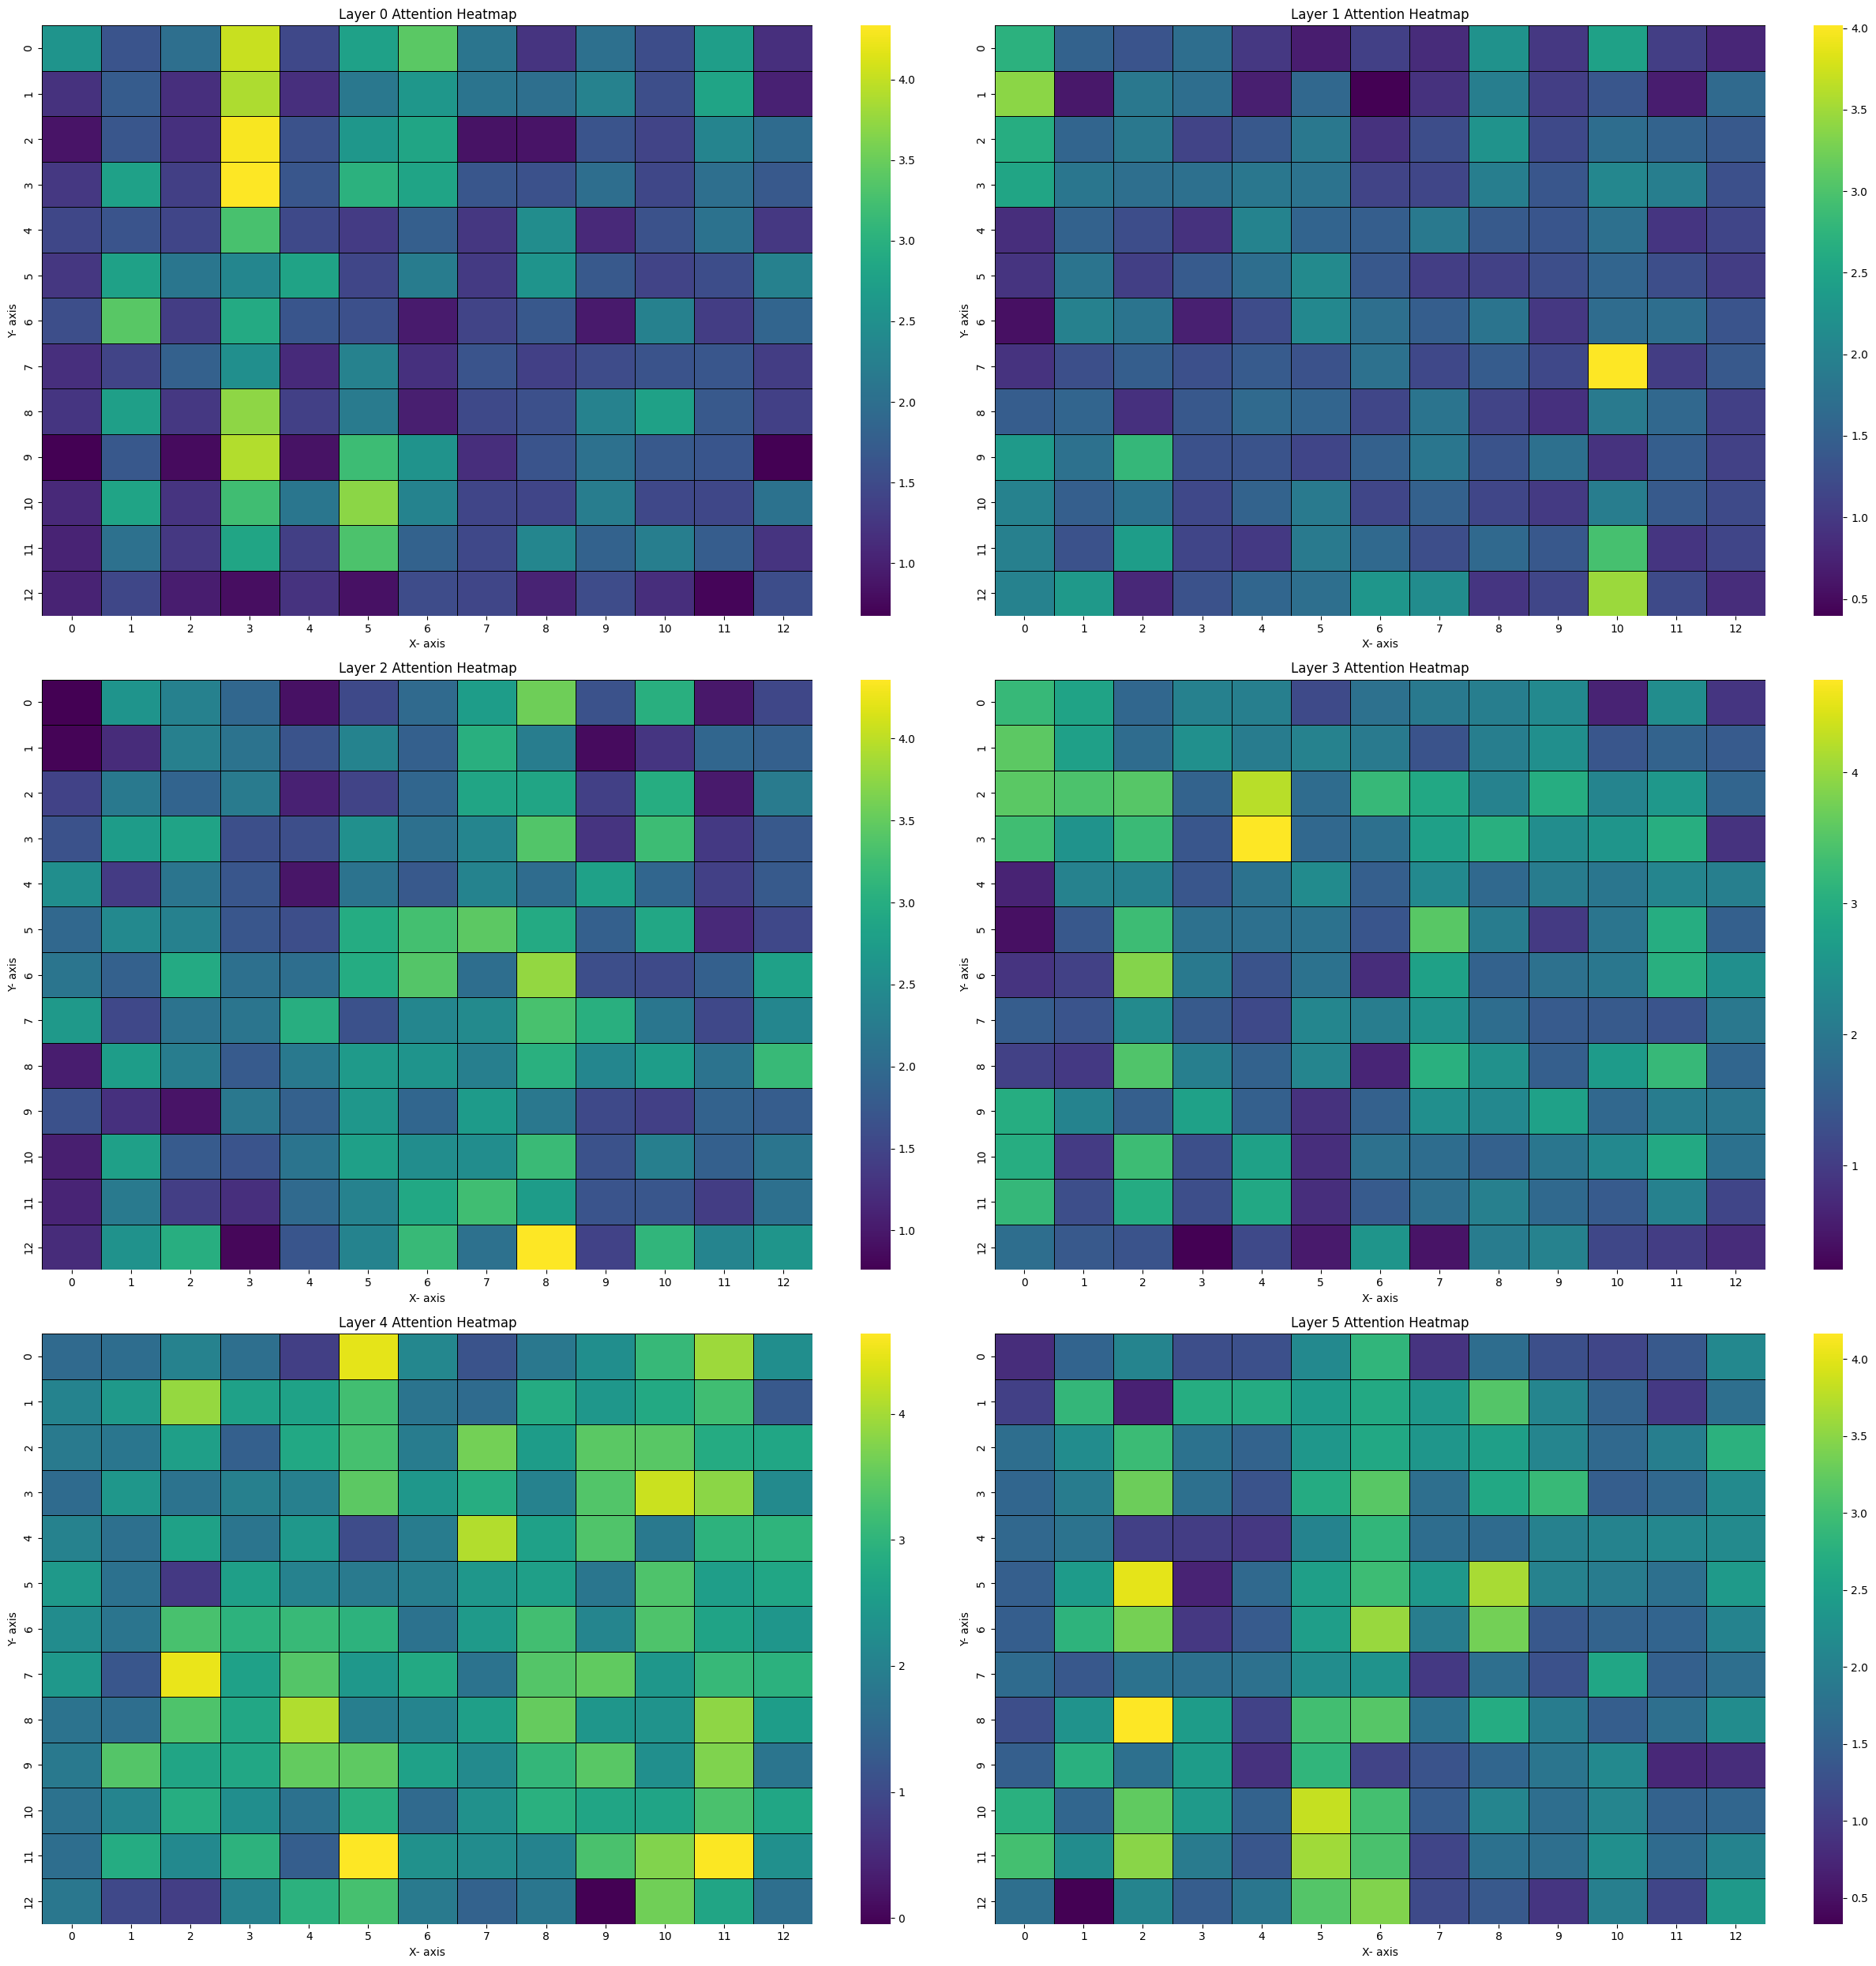

In [177]:
# heat_map_display1(img_idx=2,epoch_no=90,head=1,block_size=5)
heat_map_display(img_idx=2,epoch_no=90,head=1,block_size=5,filter_action='max_pool')

<span style="color:red"><b>>>>>>>> remote</b></span>

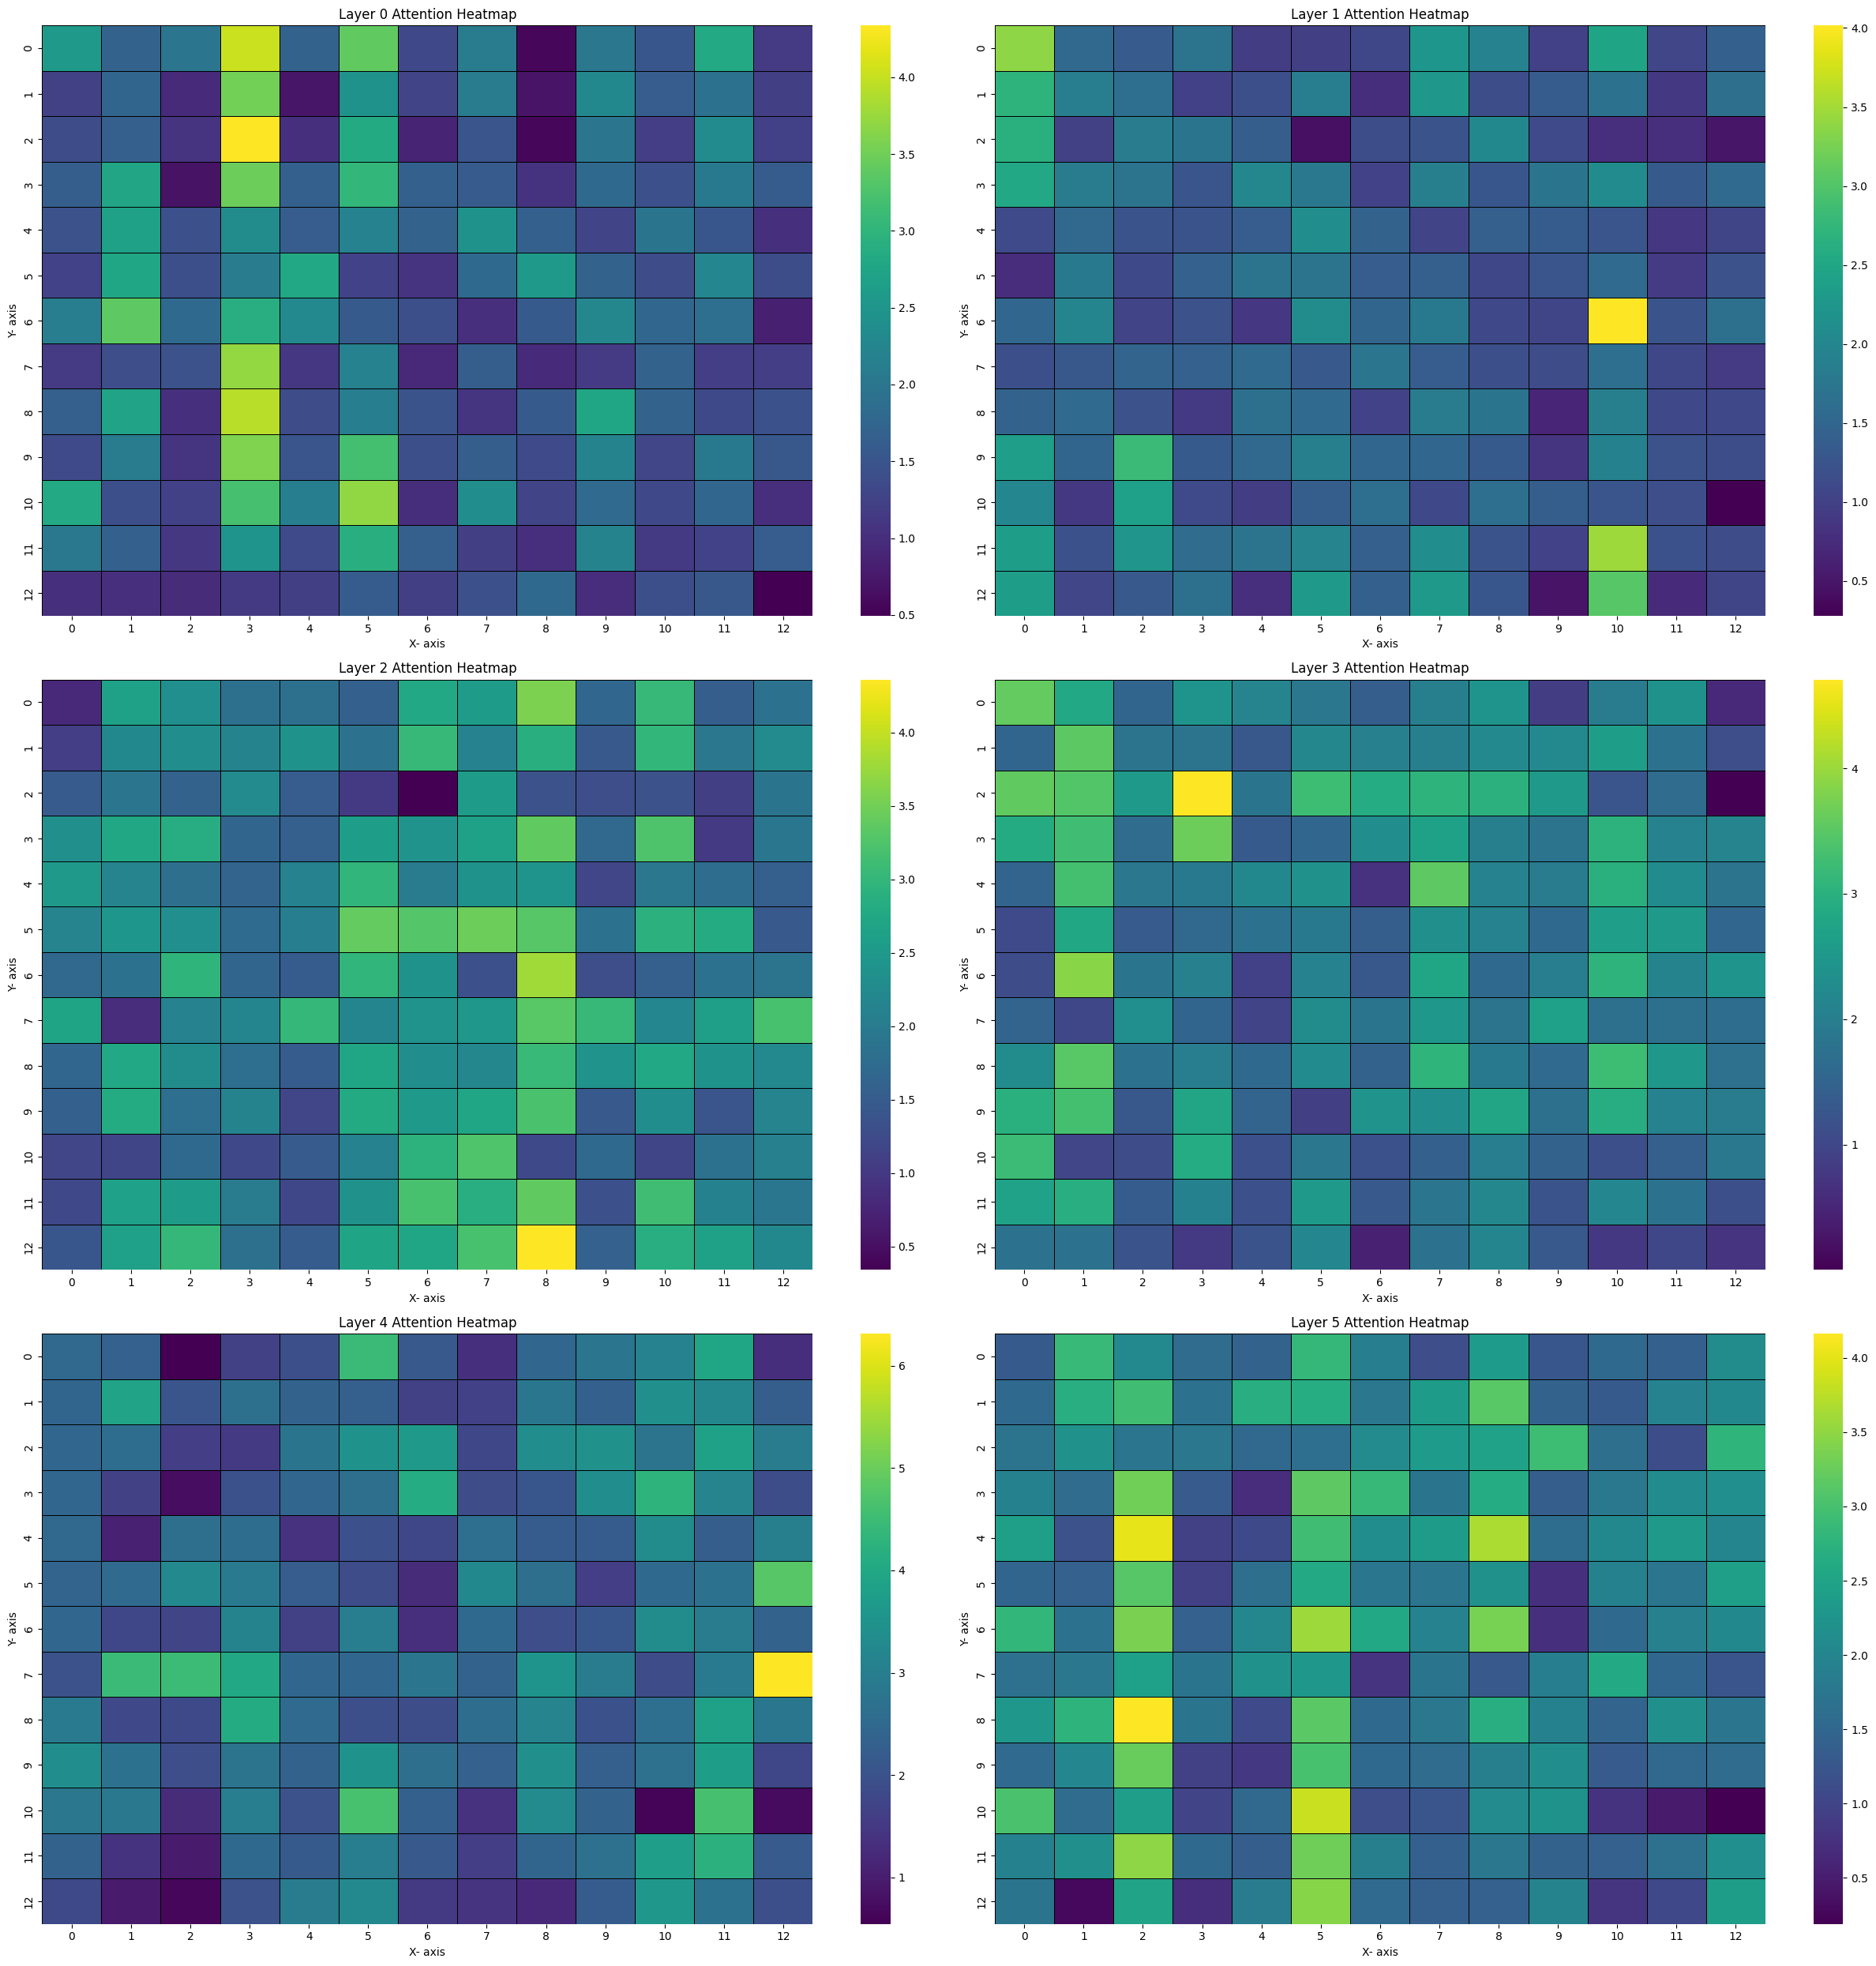

In [178]:
img_idx = 19

# display_image(inputs,img_idx)
heat_map_display(img_idx=2,epoch_no=90,head=1,block_size=5,filter_action='block_reduce')

In [179]:
# inputs.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


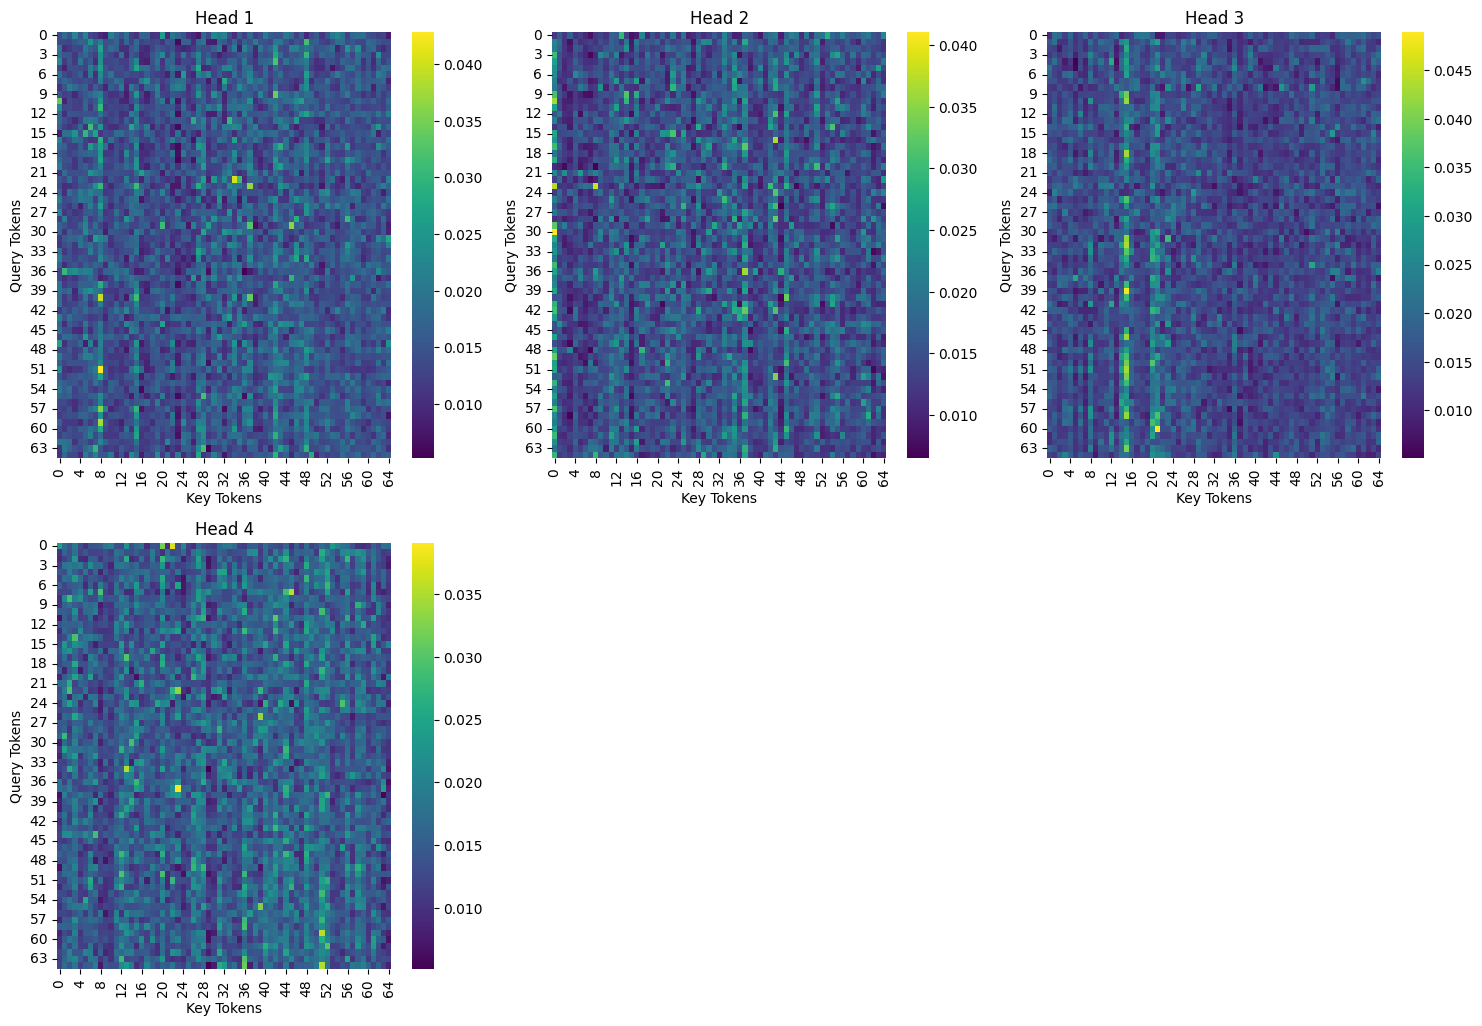

In [180]:
heat_map(npy_data[5],img_idx = 3)